## Project Code: PRCP-1018-BikeRental
### Project Name: Bike Rental Dataset
### Data Description : This is a Bike Rental dataset which contains the hourly and daily count of rental bikes in a Capital bikeshare system with the corresponding weather and seasonal information as well. The target is to predict the count of total rental bikes including both casual and registered.

# Tasks for business case:

- Regression: 
		Predication of bike rental count hourly or daily based on the environmental and seasonal settings.
	
- Event and Anomaly Detection:  
		Count of rented bikes are also correlated to some events in the town which easily are traceable via search engines.
		For instance, query like "2012-10-30 washington d.c." in Google returns related results to Hurricane Sandy. Some of the important events are 
		identified in [1]. Therefore the data can be used for validation of anomaly or event detection algorithms as well.




# Domain : Finance

In [1]:
import pandas as pd # to load / interact and manupilate dataframe
import numpy as np # for mathematical and scientific calculations
import seaborn as sns # to plot different graphs
import matplotlib.pyplot as plt # to load/render the graph
import warnings 
warnings.filterwarnings('ignore') # to avoid warnings in the file 

In [2]:
# storing first dataframe in a variable df1

df1 = pd.read_csv('day.csv')
df1

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
# storing second dataframe in a variable df2
 
df2 = pd.read_csv('hour.csv')
df2

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


# Domain Analysis

In [4]:
df1.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [5]:
# calculating summation of svalues of rented bikes date wise

In [6]:
print('Total rentel bike counts on 2012-12-31 from day csv-',df1.loc[df1['dteday'] == '2012-12-31','cnt'].sum())
print('Total rentel bike counts on 2012-12-31 from hour csv-',df2.loc[df2['dteday'] == '2012-12-31', 'cnt'] . sum())

Total rentel bike counts on 2012-12-31 from day csv- 2729
Total rentel bike counts on 2012-12-31 from hour csv- 2729


In [7]:
print('Total rentel bike counts on 2012-07-10 from day csv-',df1.loc[df1['dteday'] == '2012-07-10','cnt'].sum())
print('Total rentel bike counts on 2012-07-10 from hour csv-',df2.loc[df2['dteday'] == '2012-07-10', 'cnt'] . sum())

Total rentel bike counts on 2012-07-10 from day csv- 6290
Total rentel bike counts on 2012-07-10 from hour csv- 6290


In [8]:
print('Total rentel bike counts on 2011-03-21 from day csv-',df1.loc[df1['dteday'] == '2011-03-21','cnt'].sum())
print('Total rentel bike counts on 2011-03-2 from hour csv-',df2.loc[df2['dteday'] == '2011-03-21', 'cnt'] . sum())

Total rentel bike counts on 2011-03-21 from day csv- 2077
Total rentel bike counts on 2011-03-2 from hour csv- 2077


# Basic Check

In [9]:
df1.info() # .info() - gives information like indices , non-null count , dtype about all features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
df1.describe() # .describe() - describes statistical information about numeric features.

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [11]:
df1.isnull().sum() # calculating summaation of null values , features wise

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# EDA - Exploratory Data Analysis

## Univariate Data Analysis

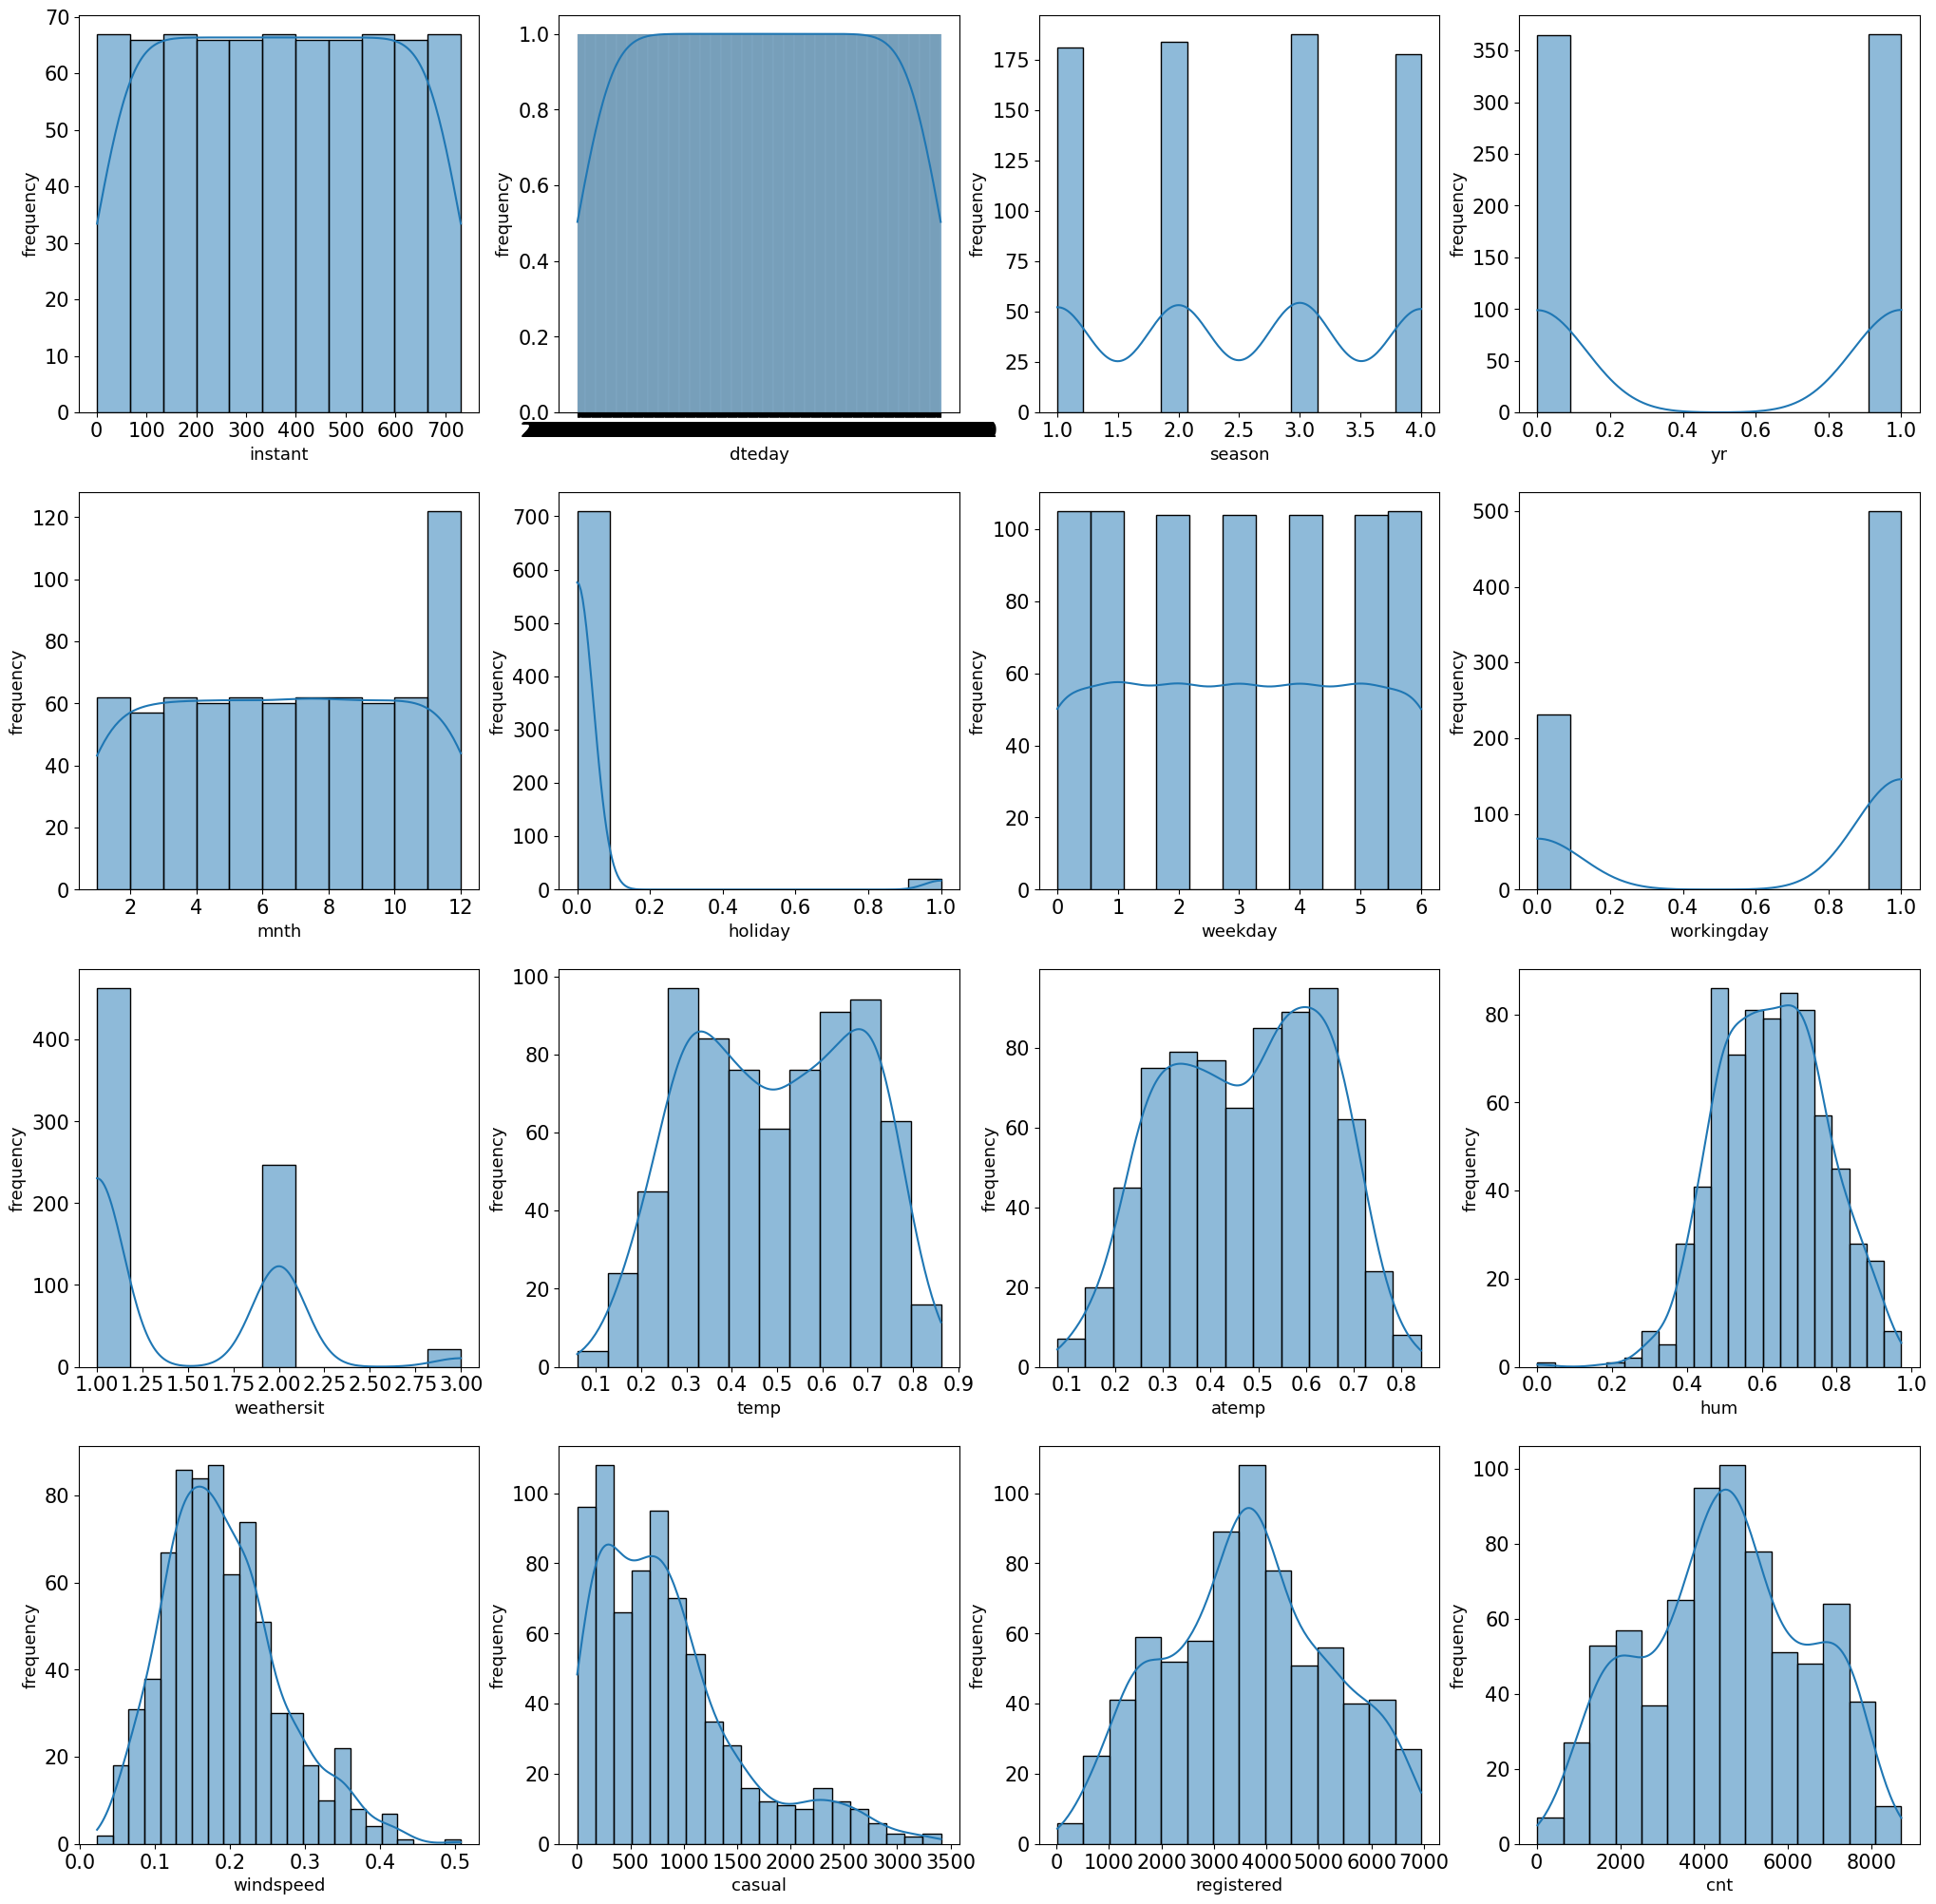

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(25,25))  # defining figure size
subplot_indices=1  # to increment subplots indices

for i in df1: 
    if subplot_indices<=16:
        plt.subplot(4,4, subplot_indices)  # 4 - represents rows of subplot , 4 - represents columns subplot
        sns.histplot(x=df1[i] , kde=True)  # plotting hist-plots through a loop variable
        plt.xlabel(i , fontsize=13)
        plt.ylabel('frequency' , fontsize=13)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        subplot_indices+=1 # incrementing loop variable to iterate through a dataframe
plt.show()
plt.tight_layout()

### Insight's from univariate analysis

## Bi-Variate Analysis

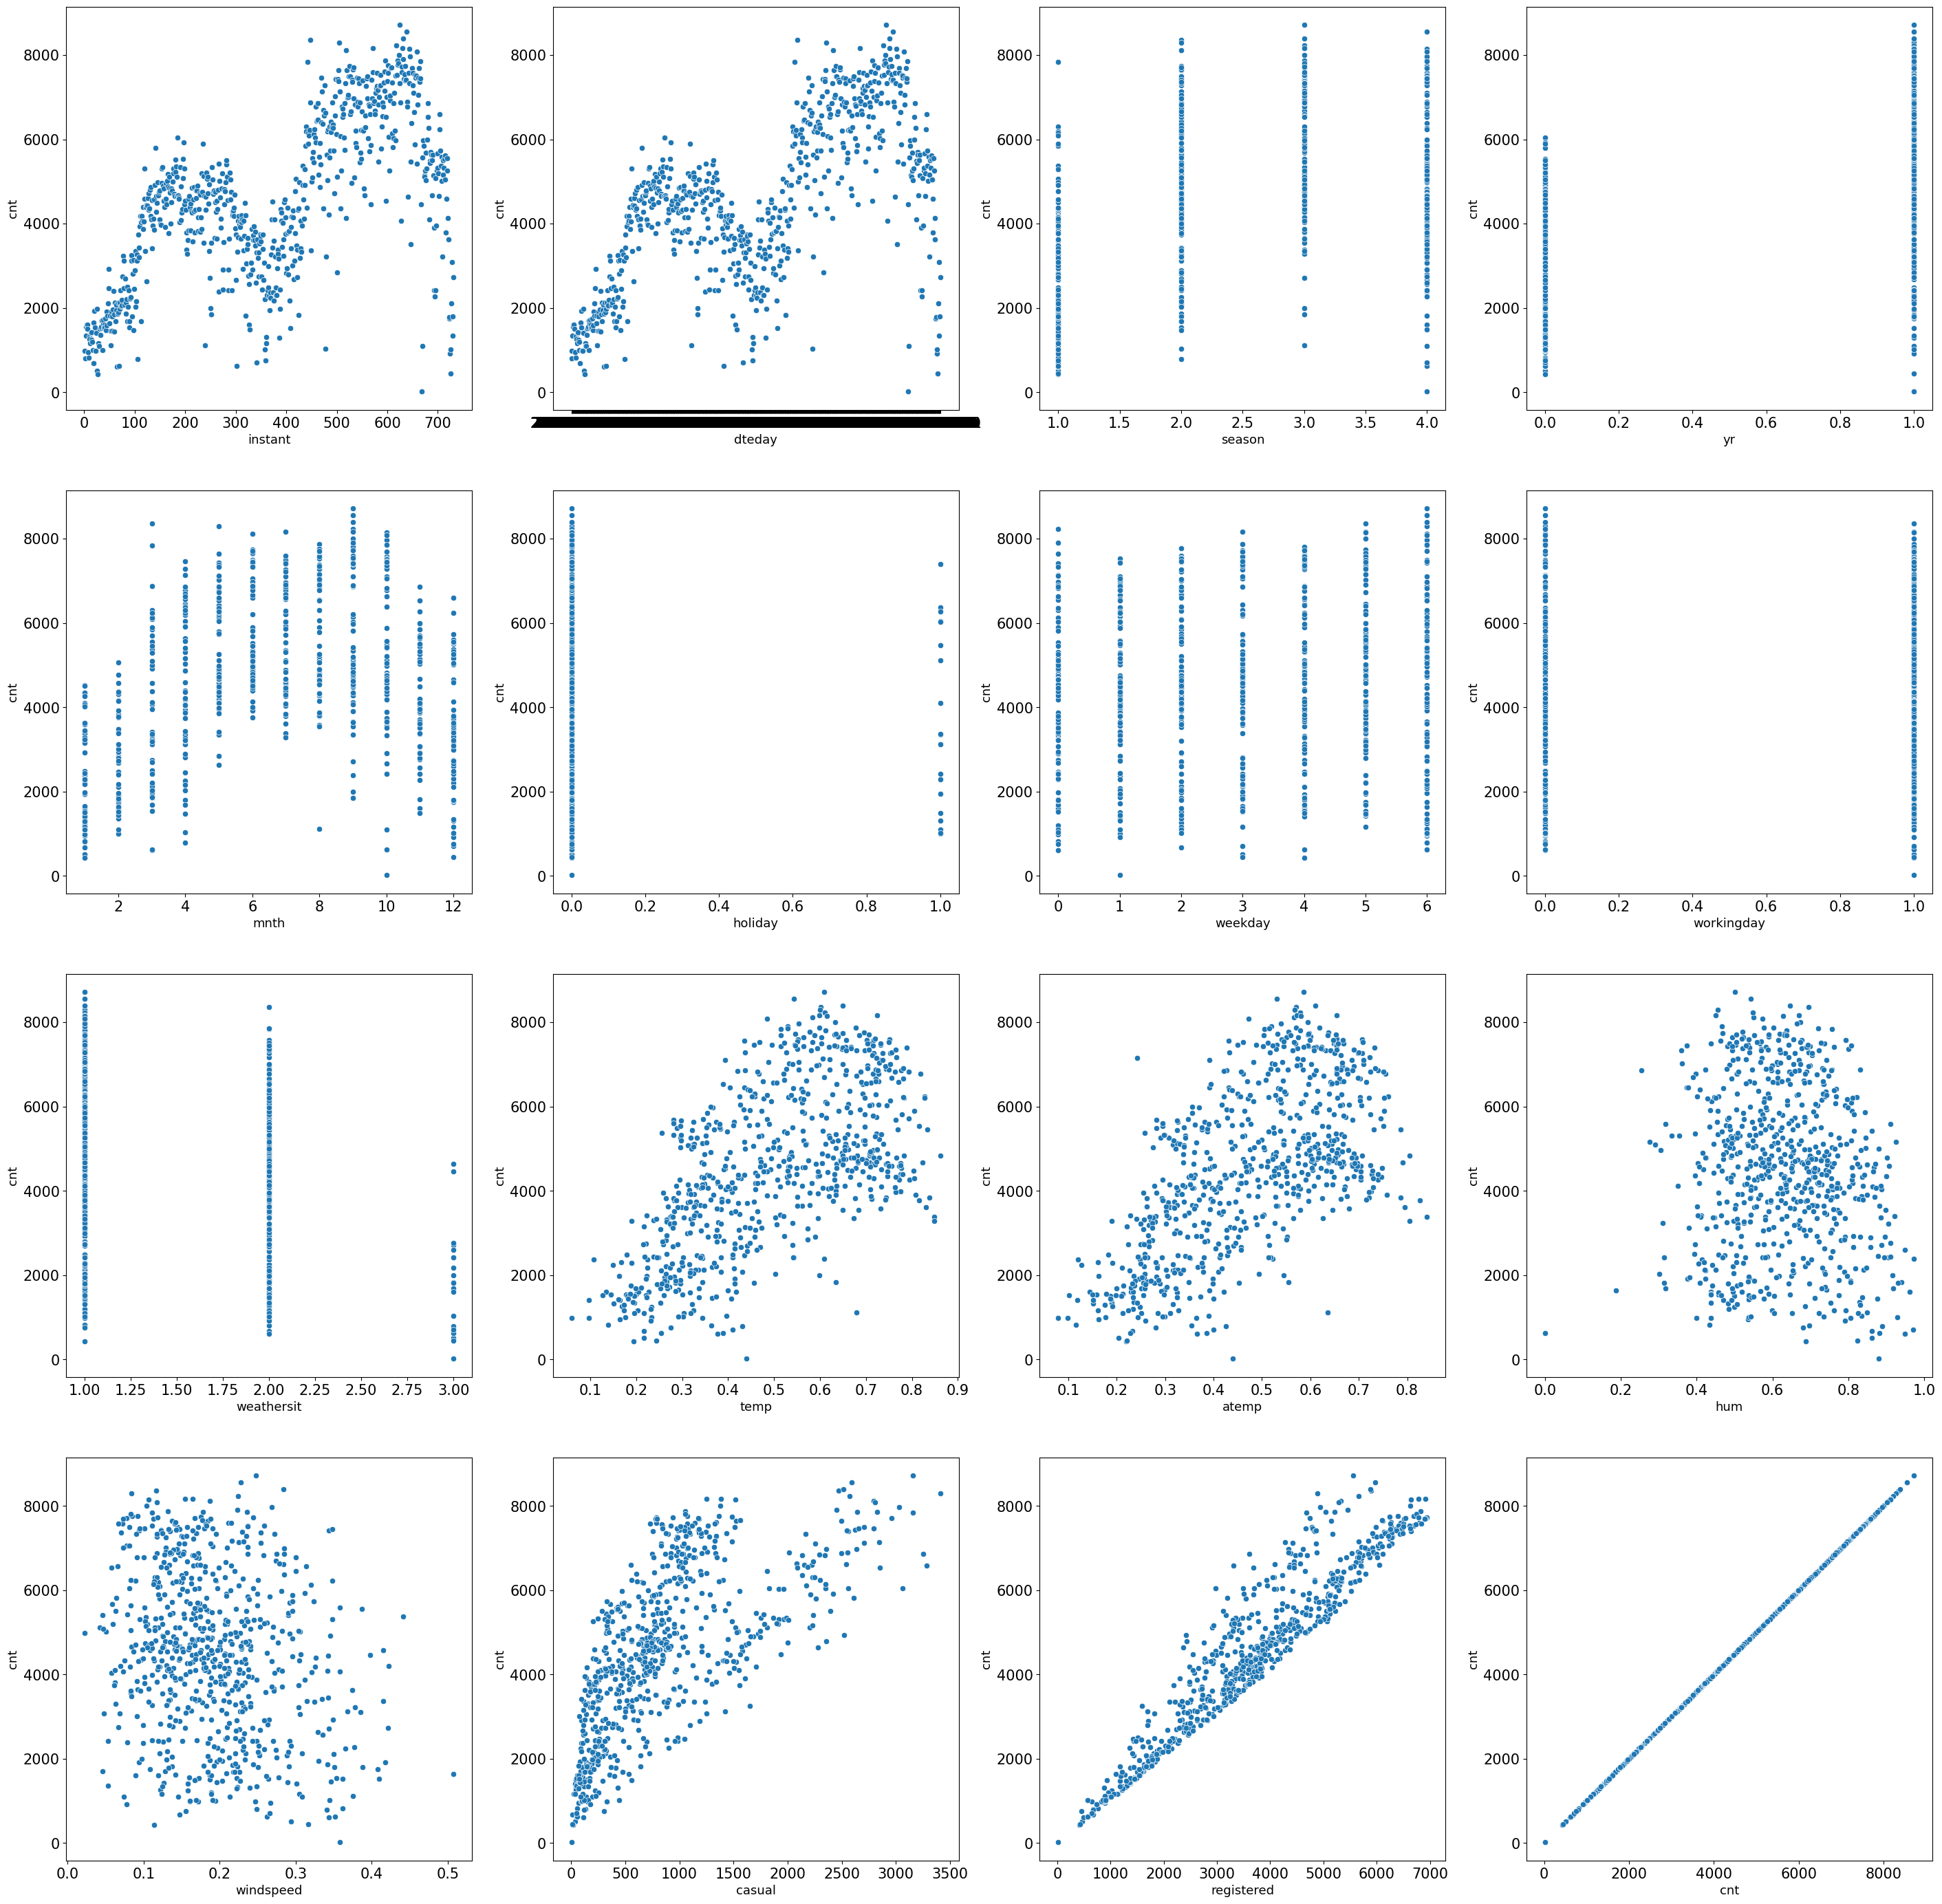

<Figure size 640x480 with 0 Axes>

In [13]:
plt.figure(figsize=(35,35))
subplot_indices=1

for i in df1:
    if subplot_indices<=16:
        plt.subplot(4,4,subplot_indices)
        sns.scatterplot(x=df1[i] , y=df1['cnt'])
        plt.xlabel(i , fontsize=13)
        plt.ylabel('cnt' , fontsize=13)
        plt.xticks(fontsize=15)
        plt.yticks(fontsize=15)
        subplot_indices+=1
plt.show()
plt.tight_layout()

### Insight's from bivariate analysis

# Feature Engineering

## Data Preprocessing

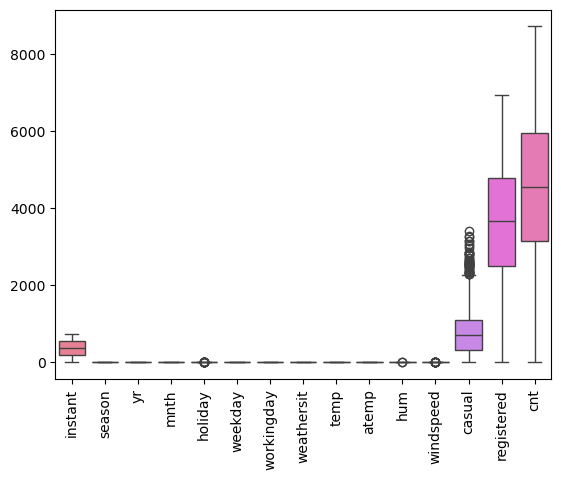

In [14]:
# plotting boxplot for all the features

sns.boxplot(df1)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='hum'>

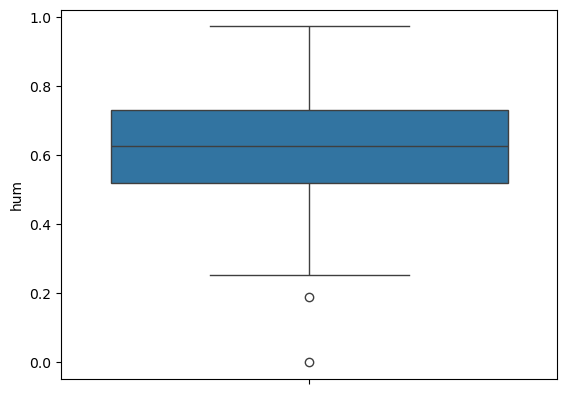

In [15]:
# plotting boxplot for humidithy column

sns.boxplot(df1.hum)

In [16]:
# calculating q1 and q3 and l.b-u.b values

hum_q1 = df1.hum.quantile(0.25) 
hum_q3 = df1.hum.quantile(0.75) 

hum_iqr = hum_q3 - hum_q1

hum_lower_bound = hum_q1 - 1.5*hum_iqr
hum_upper_bound = hum_q3 + 1.5*hum_iqr

In [17]:
#checking the numbers of outliers value

df1.loc[(df1.hum < hum_lower_bound) | (df1.hum > hum_upper_bound), 'hum']

49    0.187917
68    0.000000
Name: hum, dtype: float64

In [18]:
# dealing with outliers which are below and above bounds

df1.loc[(df1.hum < hum_lower_bound) | (df1.hum > hum_upper_bound), 'hum'] = df1.hum.median()

<Axes: xlabel='windspeed'>

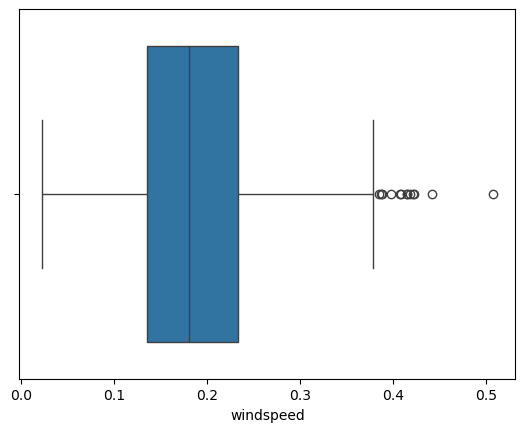

In [19]:
# plotting boxplot for windspeed.

sns.boxplot(x=df1['windspeed'])

In [20]:
# calculating q1 and q3 and l.b-u.b values

q1=0.134950 
q3=0.233214

iqr=q3-q1

ub=q3 + 1.5 * iqr

print('upper bound - ', ub)

upper bound -  0.38061


In [21]:
# dealing with outliers which are below and above bounds

df1.loc[df1['windspeed']>0.38061 , 'windspeed' ] = 0.180975

## Feature Selection

In [22]:
# printing count of unique values in two features

print('Unique values in instant-',len(df1['instant'].unique()))
print('Unique values im dteday-',len(df1['dteday'].unique()))

Unique values in instant- 731
Unique values im dteday- 731


In [23]:
# co-rrlation table of dataframe features

df1.corr(numeric_only=True)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.001615,-0.114910,0.275255,0.659623,0.628830
season,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.195570,-0.204545,0.210399,0.411623,0.406100
yr,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.123385,-0.024923,0.248546,0.594248,0.566710
mnth,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.214851,-0.189047,0.123006,0.293488,0.279977
holiday,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.018062,0.016989,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.043777,0.010554,0.059923,0.057367,0.067443
workingday,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.022673,-0.009269,-0.518044,0.303907,0.061156
weathersit,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.618158,0.062580,-0.247353,-0.260388,-0.297391
temp,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.123732,-0.139244,0.543285,0.540012,0.627494
atemp,0.152638,0.342876,0.046106,0.227459,-0.032507,-0.007537,0.052182,-0.121583,0.991702,1.000000,0.137320,-0.164492,0.543864,0.544192,0.631066


<Axes: >

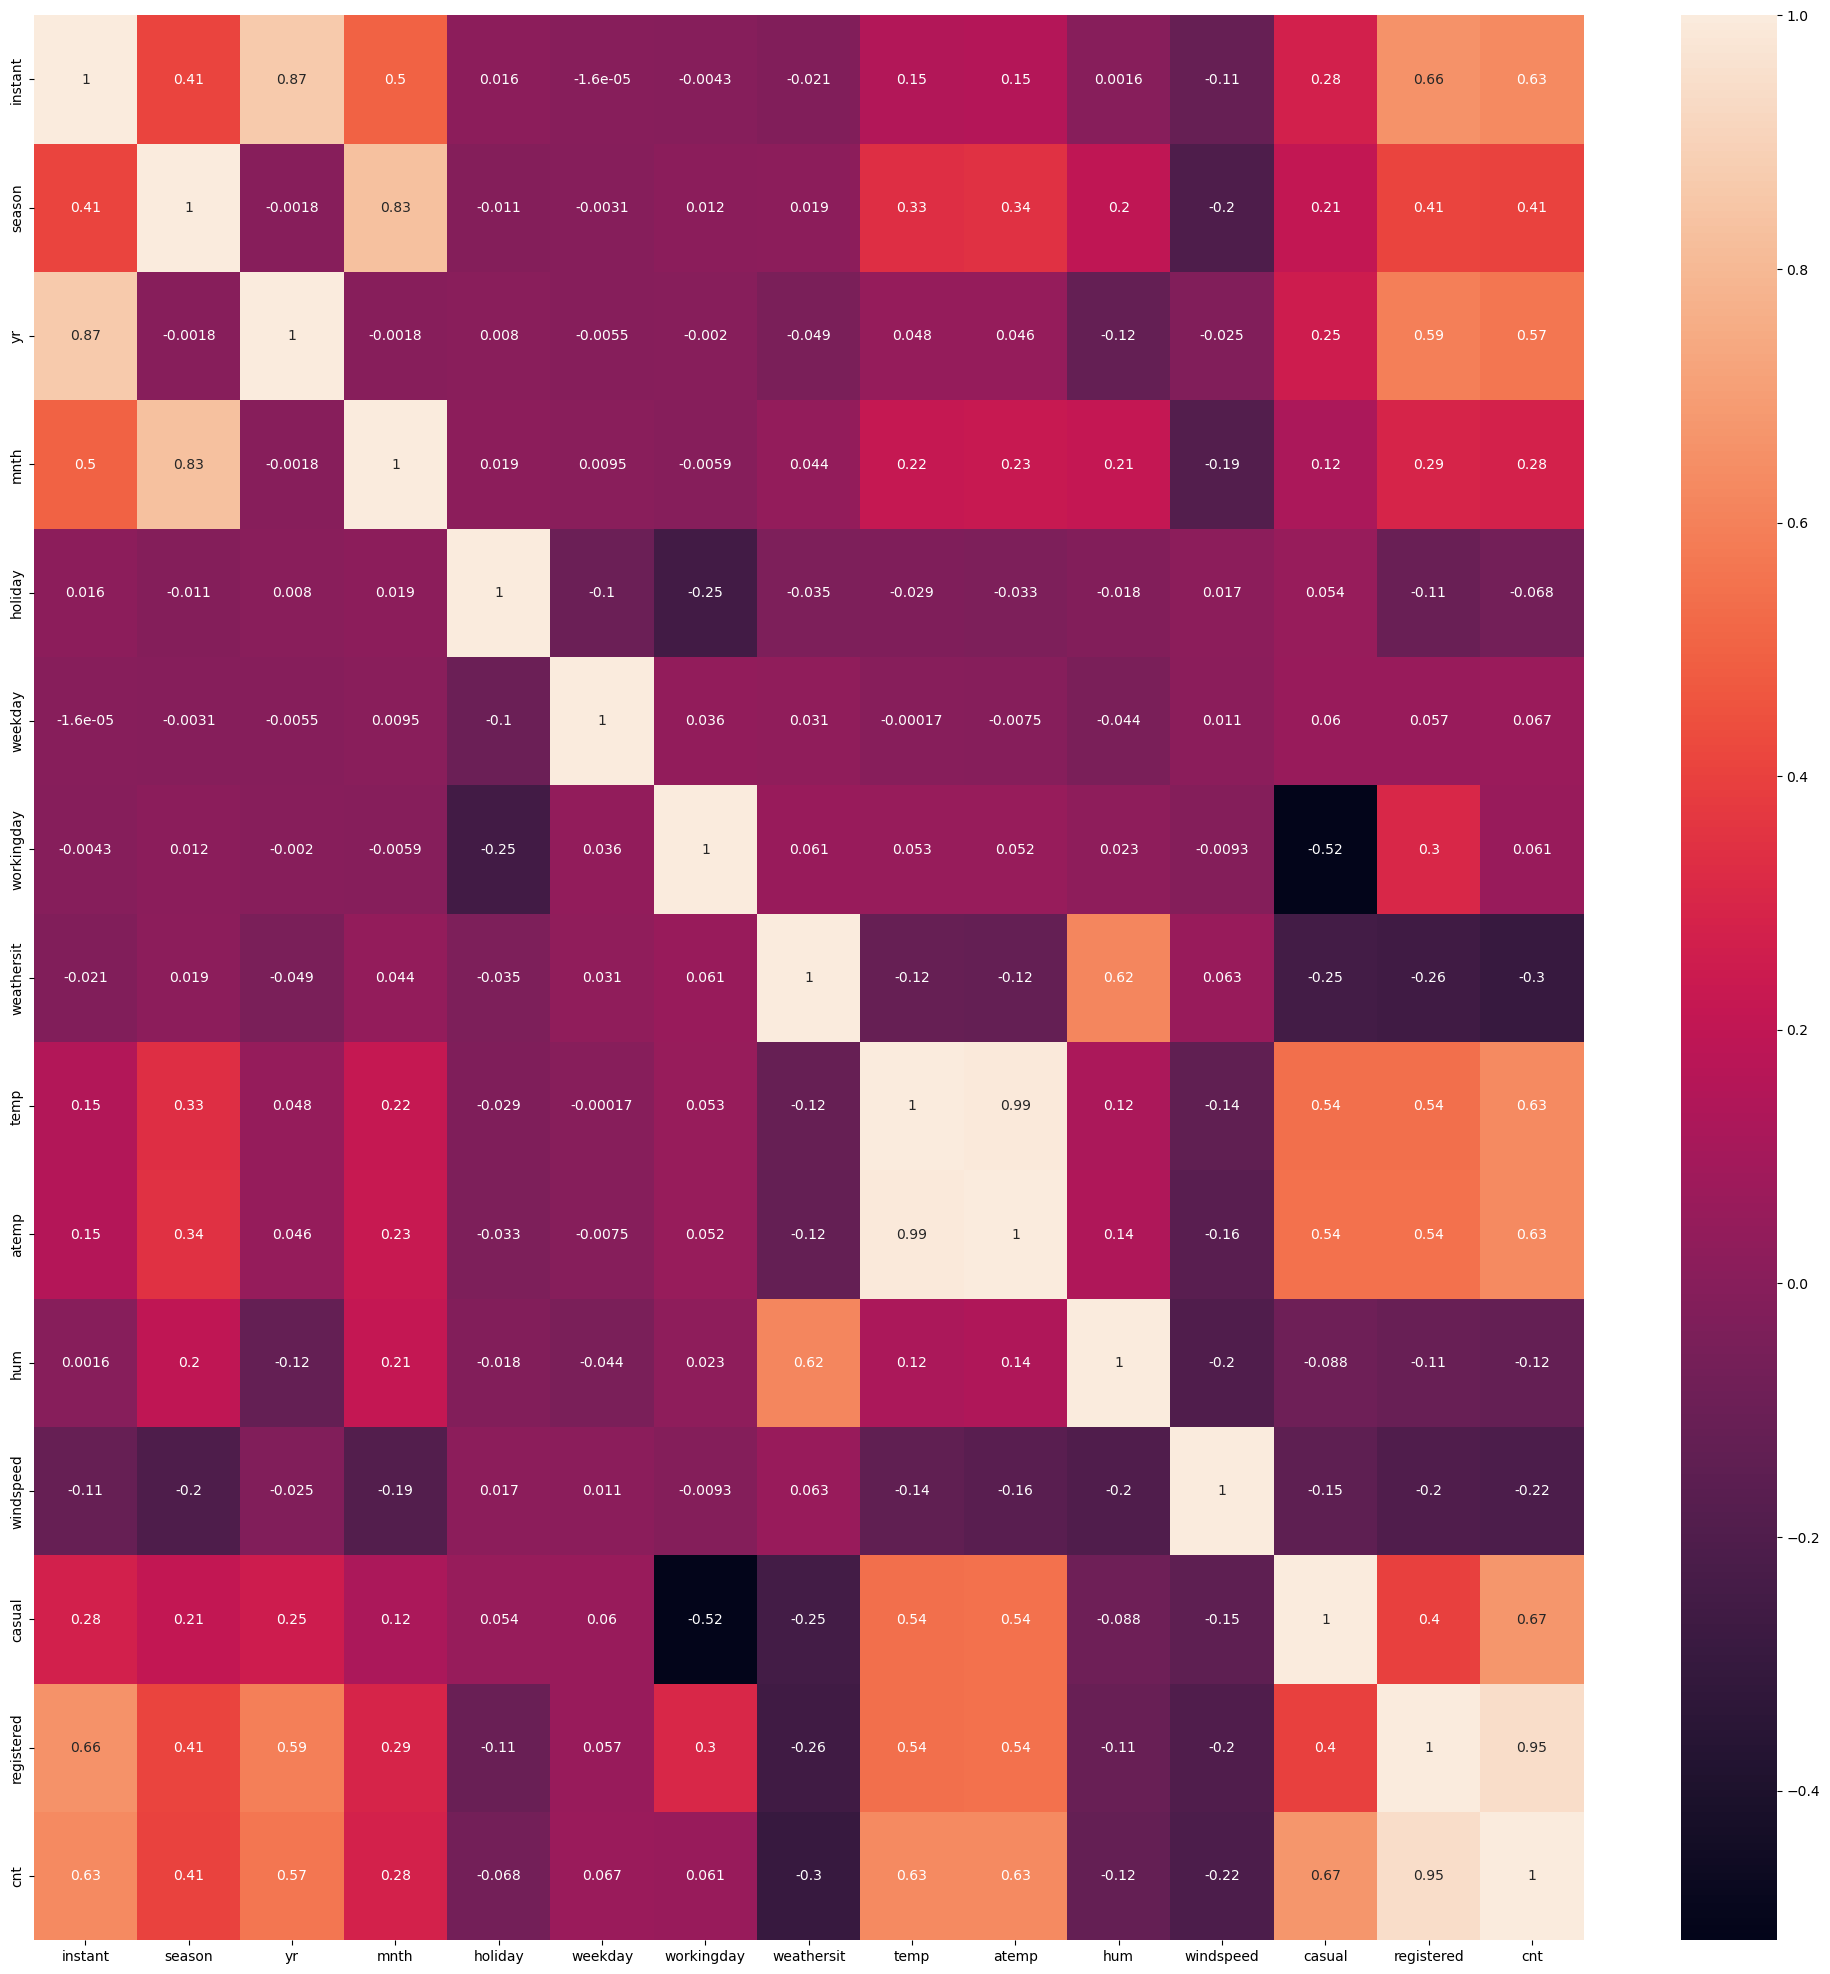

In [24]:
#  plotting heatmap 

plt.figure(figsize=(25,25))
sns.heatmap(df1.corr(numeric_only=True) , annot = True)

In [25]:
# dropping features with proper justification(which is given above (below of feature selection cell))

df1.drop(['instant', 'dteday' ,'temp' , 'casual', 'registered'] , axis=1 , inplace=True)

In [26]:
# final dataframe 

df1

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,0,2,0.353739,0.696087,0.248539,801
2,1,0,1,0,1,1,1,0.189405,0.437273,0.248309,1349
3,1,0,1,0,2,1,1,0.212122,0.590435,0.160296,1562
4,1,0,1,0,3,1,1,0.229270,0.436957,0.186900,1600
...,...,...,...,...,...,...,...,...,...,...,...
726,1,1,12,0,4,1,2,0.226642,0.652917,0.350133,2114
727,1,1,12,0,5,1,2,0.255046,0.590000,0.155471,3095
728,1,1,12,0,6,0,2,0.242400,0.752917,0.124383,1341
729,1,1,12,0,0,0,1,0.231700,0.483333,0.350754,1796


# Model Creation

In [27]:
# splitting input and output features

x=df1.iloc[: , :-1] # x - for input features
y=df1['cnt'] # y - for output feature

In [28]:
# importing train-test split , to split data into four parts for training and testing.

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=25 , test_size=0.20)

# Model Selection

In [29]:
# .fit()      - used to train the model on the training data
# .predict()  - used to make predictions on new or test data

# Evaluation metrics:

# accuracy_score - measures the overall correctness of the model
# f1_score       - balances precision and recall, useful for imbalanced datasets

## Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr

LinearRegression()

In [31]:
lr.fit(x_train  , y_train)

LinearRegression()

In [32]:
pred_lr= lr.predict(x_test)

In [33]:
from sklearn.metrics import mean_squared_error , r2_score

In [34]:
mean_squared_error(y_test , pred_lr)

657015.0262522419

In [35]:
r2_score(y_test , pred_lr)

0.8073590968622382

## Evaluating linear regression on training data

In [36]:
tr_pred_lr=lr.predict(x_train)

In [37]:
r2_score(y_train , tr_pred_lr)

0.794121862234455

## SVM

In [38]:
from sklearn.svm import SVR
svm = SVR()
svm

SVR()

In [39]:
svm.fit(x_train , y_train)

SVR()

In [40]:
pred_svm = svm.predict(x_test)

In [41]:
mean_squared_error(y_test , pred_svm)

3383852.650458555

In [42]:
r2_score(y_test , pred_svm)

0.007833299661583082

### Hyper Parameter of SVM

In [43]:
params = {
    'C':[0.01 , 0.1 , 1 , 100] ,
    'kernel':['rbf' , 'poly' , 'linear' , 'sigmoid'],
    'gamma':['auto' , 'scale']
}

In [44]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [45]:
grid = GridSearchCV(svm , param_grid=params , scoring='r2',cv=5 , n_jobs=1 , verbose=1 , refit=True)

grid.fit(x_train , y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVR(), n_jobs=1,
             param_grid={'C': [0.01, 0.1, 1, 100], 'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'linear', 'sigmoid']},
             scoring='r2', verbose=1)

In [46]:
pred_grid=grid.predict(x_test)

In [47]:
r2_score(y_test , pred_grid)

0.7647963394931611

## Evaluating tuned svm on training data

In [48]:
tr_pred_tuned_svm=grid.predict(x_train)

In [49]:
r2_score(y_train , tr_pred_lr)

0.794121862234455

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt

DecisionTreeRegressor()

In [51]:
dt.fit(x_train , y_train)

DecisionTreeRegressor()

In [52]:
pred_dt= dt.predict(x_test)

In [53]:
mean_squared_error(y_test , pred_dt)

760533.768707483

In [54]:
r2_score(y_test , pred_dt)

0.7770067559850192

### Hyper parameter tuning of decision tree

In [55]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [56]:
param_grid = {
    "criterion":('friedman_mse', 'squared_error', 'poisson', 'absolute_error'), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 15))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,10],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 15)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
    }

In [57]:
dt_tuned_model = GridSearchCV(dt , param_grid , refit=True , cv=5 , n_jobs=-1 , verbose=1 , scoring='r2')

dt_tuned_model.fit(x_train , y_train)

Fitting 5 folds for each of 7840 candidates, totalling 39200 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ('friedman_mse', 'squared_error',
                                       'poisson', 'absolute_error'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14],
                         'min_samples_split': [2, 3, 4, 5, 10],
                         'splitter': ('best', 'random')},
             scoring='r2', verbose=1)

In [58]:
pred_by_tuned_dt=dt_tuned_model.predict(x_test)

In [59]:
from sklearn.metrics import r2_score

# Predict using the best model found by GridSearchCV
y_pred = dt_tuned_model.predict(x_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


R2 Score: 0.8761391809589819


## Evaluating tuned decision tree on training data

In [60]:
tr_pred_tuned_dt=dt_tuned_model.predict(x_train)

In [61]:
r2_score(y_train , tr_pred_tuned_dt)

0.9218964489082009

## Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf

RandomForestRegressor()

In [63]:
rf.fit(x_train , y_train)

RandomForestRegressor()

In [64]:
pred_rf=rf.predict(x_test)

In [65]:
r2_score(y_test , pred_rf)

0.8931401983057

### Hyper parameter tuning of random forest

In [66]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=5)]      # List Comprehension-using for loop in list
max_features = ['auto', 'sqrt','log2']        # maximum number of features allowed to try in individual tree
max_depth = [int(x) for x in np.linspace(10, 110, num=5)]            # List Comprehension-using for loop in list
max_depth.append(None)
min_samples_split = [5, 10]          # minimum number of samples required to split an internal node
min_samples_leaf = [2, 4]              # minimum number of samples required to be at a leaf node.

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

rf_clf1 = RandomForestRegressor(random_state=42)   # Loading the model

rf_cv = GridSearchCV(estimator=RandomForestRegressor(random_state=42), scoring='r2',param_grid= random_grid, cv=3,
                               verbose=1, n_jobs=-1)
# estimator--number of decision tree
# scoring--->performance matrix to check performance
# param_distribution-->hyperparametes(dictionary we created)
# n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
# cv------> number of flods
# verbose=Controls the verbosity: the higher, the more messages.
# n_jobs---->Number of jobs to run in parallel,-1 means using all processors.

rf_cv.fit(x_train,y_train)      # training data on randomsearch cv

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 35, 60, 85, 110, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10],
                         'n_estimators': [200, 650, 1100, 1550, 2000]},
             scoring='r2', verbose=1)

In [67]:
pred_tuned_rf_cv=rf_cv.predict(x_test)

In [68]:
r2_score(y_test , pred_tuned_rf_cv)

0.9058780258058947

## Evaluating tuned random forest on training data

In [69]:
tr_pred_tuned_rfcv=rf_cv.predict(x_train)

In [70]:
r2_score(y_train , tr_pred_tuned_rfcv)

0.9520527068855783

## Gradient Booting

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

In [72]:
gb=GradientBoostingRegressor()
gb

GradientBoostingRegressor()

In [73]:
gb.fit(x_train , y_train)

GradientBoostingRegressor()

In [74]:
pred_gb=gb.predict(x_test)

In [75]:
r2_score(y_test,pred_gb)

0.9131337843353448

## Evaluating tuned gb on training data

In [76]:
tr_pred_gb=gb.predict(x_train)

In [77]:
r2_score(y_train , tr_pred_gb)

0.9496285741080331

## Xtreme Gradient boosting

In [78]:
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [79]:
xgb.fit(x_train , y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [80]:
pred_xgb=xgb.predict(x_test)

In [81]:
r2_score(y_test , pred_xgb)

0.8938602805137634

## Evaluating xgb on training data

In [82]:
tr_pred_xgb=xgb.predict(x_train)

In [83]:
r2_score(y_train , tr_pred_xgb)

0.9998929500579834

### Hyper parameter tuning of xgb

In [84]:
# Importing RandomizedSearchCV from sklearn
from sklearn.model_selection import GridSearchCV

# Define parameters grid for gamma, learning_Rate, max_depth, n_estimator, reg_alpha, reg_lamdba
param_grid = {'gamma': [0,0.1,0.2,0.4],
              'learning_rate': [0.01, 0.03, 0.06, 0.1],
              'max_depth': [5,6,7,8,9],
              'n_estimators': [50,65,80],
              'reg_alpha': [0,0.1,0.2,0.4],
              'reg_lambda': [0,0.1,0.2]}

XGB=XGBRegressor()  # Assigning XGBClassifier model into variables
tuned_xgb= GridSearchCV(estimator=XGB, scoring='r2',refit=True,param_grid=param_grid,  cv=4, 
                               verbose=1, n_jobs=-1)
                               
#estimator--number of decision tree
#scoring--->performance matrix to check performance
#param_distribution-->hyperparametes(dictionary we created)
#n_iter--->Number of parameter settings that are sampled. n_iter trades off runtime vs quality of the solution.default=10
##cv------> number of flods
#verbose=Controls the verbosity: the higher, the more messages.
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
                        
tuned_xgb.fit(x_train,y_train)##training data on randomsearch cv


Fitting 4 folds for each of 2880 candidates, totalling 11520 fits


GridSearchCV(cv=4,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0, 0.1, 0.2, 0.4],
                         'learning_rate': [0.01, 0.03, 0.06, 0.1],
                         'max_depth': [5, 6, 7, 8, 9],
                         'n_estimators': [50, 65, 80],
                         'reg_alpha': [0, 0.1, 0.2, 0.4],
                         'reg_lambda': [0, 0.1, 0.2]},
             scoring='r2', verbose=1)

In [85]:
pred_tuned_xgb=tuned_xgb.predict(x_test)

In [86]:
r2_score(y_test , pred_tuned_xgb)

0.8946757912635803

## Evaluating tuned xgb on training data

In [87]:
tr_pred_tuned_xgb=tuned_xgb.predict(x_train)

In [88]:
r2_score(y_train , tr_pred_tuned_xgb)

0.9845438599586487

### Bagging on linear regression

In [89]:
from sklearn.ensemble import BaggingRegressor

lr_bagging = BaggingRegressor(estimator=lr , n_estimators = 1000 , random_state=34)

lr_bagging.fit(x_train , y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=1000,
                 random_state=34)

In [90]:
pred_lr_bagg=lr_bagging.predict(x_test)

In [91]:
r2_score(y_test , pred_lr_bagg)

0.8073751320887967

### Bagging on Tuned svm - support vector machine

In [92]:
from sklearn.ensemble import BaggingRegressor

grid_svm_bagging = BaggingRegressor(estimator=grid.best_estimator_ , n_estimators = 500 , random_state=34)

grid_svm_bagging.fit(x_train , y_train)

BaggingRegressor(estimator=SVR(C=100, gamma='auto', kernel='linear'),
                 n_estimators=500, random_state=34)

In [93]:
pred_grid_svm_bagg=grid_svm_bagging.predict(x_test)

In [94]:
r2_score(y_test , pred_grid_svm_bagg)

0.7619948606790774

### Bagging on Tuned decision tree

In [95]:
from sklearn.ensemble import BaggingRegressor

grid_svm_bagging = BaggingRegressor(estimator=dt_tuned_model.best_estimator_ , n_estimators = 500 , random_state=34)

grid_svm_bagging.fit(x_train , y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(criterion='poisson',
                                                 max_depth=14,
                                                 min_samples_leaf=3,
                                                 splitter='random'),
                 n_estimators=500, random_state=34)

In [96]:
pred_grid_svm_bagg=grid_svm_bagging.predict(x_test)

In [97]:
r2_score(y_test , pred_grid_svm_bagg)

0.9093256740718169

# Model Comparsion Report

### Score Tabel

In [99]:
model = pd.DataFrame({
    'Models':['Linear Regresson' , 'Tuned Svm' , 'Tuned Decision Tree' , 'Tuned Random Forest' ,'Gradient Boosting ', 'Xtreme Gradient Boosting' ],
    'R2 Scores':['80%' , '76%' , '87%' , '90%', '91%' , '89%' ],
})

model

,Models,R2 Scores
0,Linear Regresson,80%
1,Tuned Svm,76%
2,Tuned Decision Tree,87%
3,Tuned Random Forest,90%
4,Gradient Boosting,91%
5,Xtreme Gradient Boosting,89%


# Conclusion



We had a regression task for this dataset.

Two datasets were provided, but since both datasets contain the same information (rental counts), and the day.csv file has fewer records, it offers lower time complexity for further processing. Therefore, we proceeded with the day.csv dataset.

Both datasets were easy to work with, and minimal data preprocessing was required.

Four out of six algorithms/models performed well for this task.

# Report on challenges faced

## Create a report which should include challenges you faced on data

-Algorithms like Linear Regression, SVM, and Decision Tree did not achieve good R² scores on a basic scale.

-However, methods like hyperparameter tuning and bagging performed well and gave much better results.

-No overfitting issues were observed.

-No other significant challenges were encountered during this project.

# What Technique used with proper reason

1]Emputation Method

Reason: to handle null/corrupted and outliers in cntinuous features.

2]HyperParameter Tuning-

Reason: To find optimal values of paramters of respective algorithms.

3]Ensemble Technique:

Reason: to implement RandomForest , Gradient Boosting and XGb.